--------------------------------------------------------------------------

**Team Name:** Apollo Development Team

**Group Number:** 3

**Team Members:** Noah Linton, Calvin Villanueva, and Lane Summersil

**Members Contribution:**
- Noah Linton
  - Cleaning: Filtering the data to only consider features we're interested  in working with (year and commonly used maturity rating), eliminating other unwanted factors from being considered in our analysis
  - Structuring: Structing data and logical steps needed based on the focus of the analysis to ensure accurate and reliable outcomes of tests performed.
  - Logic Validation

- Calvin Villanueva
  - Validation: Processing the features of focus to produce the averages of IMDB rating and maturity rating. Ensuring calculations found matches the results displayed in visuals
  - Enrichment: Preforming inferential statistical test and verifying findings to prove/disprove hypothesis
  - Notebook structure and presentation design

- Lane Summersill
  - Data Visualization: Visualizing the findings of analysis and overall design of graphs.
  - Comments: Ensuring comments explains logic well and is easy to follow throughout the analysis
  - Grammer checking on the explanations and summaries detailed in the notebook.
--------------------------------------------------------------------------
# **Description:**
This is our analysis of 2 data sets obtained from Data.World. the datasets we used for our analysis can be found on their website titled "*IMDB Top 250 List and 5000+ Entries*" and "*Top Rated English Movies of this decade from IMDB*". With these two datasets, we hoped to draw analysis from both of them by merging the two as each of the data set contained features we were interested in studying. The dataset "*IMDB Top 250 List and 5000+ Entries*" was interesting for us as it contained features such as movie release year, maturity rating, and IMDB ratings for each of the entries. Our other dataset, "*Top Rated English Movies of this decade from IMDB*", although much smaller in comparison, was interesting for us as it contained similar features to our first one, except with the addition of a feature with the number of votes made by certain age demographics. With these 2 datasets, we combined them into a csv file that we used to conduct our testing that is required in order for the following code below to execute. This csv file is titled **"combined.csv"**.

# **Data Source:**

"*IMDB Top 250 List and 5000+ Entries*"

( https://data.world/studentoflife/imdb-top-250-lists-and-5000-or-so-data-records )


"*Top Rated English Movies of this decade from IMDB*"

(https://data.world/saipranav/top-rated-english-movies-of-this-decade-from-imdb)



--------------------------------------------------------------------------

The questions we wanted to address with our newly combined datasets is as listed below:

# **Primary Question:**
**Does Maturity rating affect it's IMDB rating?**

**Null Hypothesis:** Maturity rating has no effect on the IMDB rating

**Alternate Hypothesis:** Maturity rating does have an effect on the IMDB rating.

--------------------------------------------------------------------------

# **Secondary Question:**
**Is there a trend (pos. or neg.) in the data when it comes to the maturity rating of a movie and its IMDB rating?**

**Null Hypothesis:** There is no trend in the data when it comes to the maturity rating and its IMDB rating.

**Alternative Hypothesis:** There is a trend (pos./neg.) in the data when it comes to the maturity rating and its IMDB rating.

--------------------------------------------------------------------------


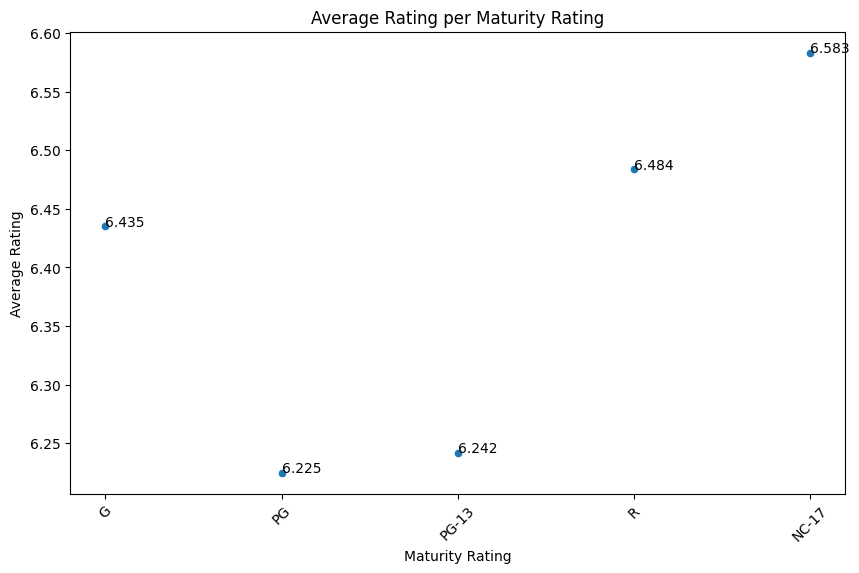

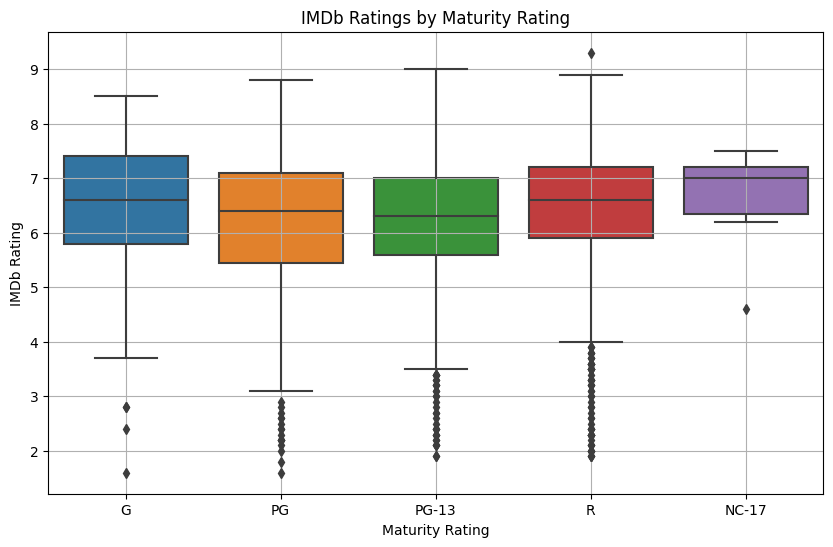

Rated
G        6.435
PG       6.225
PG-13    6.242
R        6.484
NC-17    6.583
Name: Rating_y, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


'''
Before we began our analysis and testing, we first wanted to specify the maturity ratings we primarily wanted to focus on, which were the most commonly known maturity rating used today
as our data set contained entries for some movies that had maturity ratings of approved, passed, and not rated. so to avoid using the data on these entries, we focused on drawing
our conclusions from movies that had the maturity rating of G, PG, PG-13, R, and NC-17. We also sorted this maturity rating in ascending order to briefly analyze if there were trends
in the IMDB rating as we went up the Maturity rating. Additionally, we also only considered movies made past 1976 as we found that some of the movies made before that year lacked the information
we were looking for.

For our first analysis, we began by simply grouping our variables, which were 'Rated' (maturity rating) and 'Rating_y'(IMDB Rating). By doing so, we can then pass the results of the two to a new
variable to calculate the rating average. after doing so, we can then use the results found using Seaborn to create the scatterplot. Additionally, we also wanted to illustrate a different
means of visualization by providing the descriptive statistics of each maturity rating by using a box plot.
'''




#Assign the csv required to execute(combined.csv must be uploaded to google colab)
df = pd.read_csv('combined.csv')


#Specify the maturity rating we only want to focus on into a variable (we want to ignore ratings that may affect our results such as "approved","unapproved","passed" etc. )
allowed_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17']

#We filter the dataframe to only account for movies made during or past 1976 and specify to only consider entries with the corresponding maturity rating above
df_filtered = df[(df['Year'] >= 1976) & (df['Rated'].isin(allowed_ratings))].copy()

#We define the scaling value onto a dictionary of each of the maturity rating we want to consider, with G being the lowest, and NC-17 at the highest.
rating_scale = {'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4, 'NC-17': 5}

#then we map the maturity rating based on the order we specified above.
df_filtered['Maturity_Rating_Order'] = df_filtered['Rated'].map(rating_scale)




#Compute the average IMDb ratings for each maturity rating based on the previously specified rating in the order of the rating scale.
rating_avg = df_filtered.groupby('Rated')['Rating_y'].mean().sort_values(ascending=True, key=lambda x: x.index.map(rating_scale))



#Plot the average ratings of each maturity rating using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rating_avg.index, y= rating_avg.values)
plt.xticks(rotation=45)
plt.xlabel('Maturity Rating')
plt.ylabel('Average Rating')


#Display the average IMDB rating of each maturity rating on their respective position on the scatter plot
for i, txt in enumerate(rating_avg.values):
    plt.annotate("{:.3f}".format(txt), (rating_avg.index[i], rating_avg.values[i]))
plt.title('Average Rating per Maturity Rating')
plt.show()




#provide a box plot to visualize other descriptive statistics about maturity rating and their IMDB average.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Rated', y='Rating_y', order=rating_scale)
plt.title('IMDb Ratings by Maturity Rating')
plt.xlabel('Maturity Rating')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

print(rating_avg.round(3))

--------------------------------------------------------------------------
# **Scatter Plot and Box Plot Results:**

At first glance, we can immediately see from the scatter plot and box plot that the average IMDB rating of each maturity rating seems to slowly climb up as we go further up on the maturity rating scale. If we look at the descriptive statistics, we can see that G-rated films sit at the 50% mark. however, once we start climbing up the maturity rating we can see that the average takes a dip when it comes to PG and PG-13, with both the Maturity rating sitting at or below the 25% mark. Once we start moving up the maturity rating once again, we can see that the average goes back up with Rated R and NC-17 Movies both sitting at or above the 75% mark. These visualizations alone motivated us to see if we can answer our primary and secondary questions.


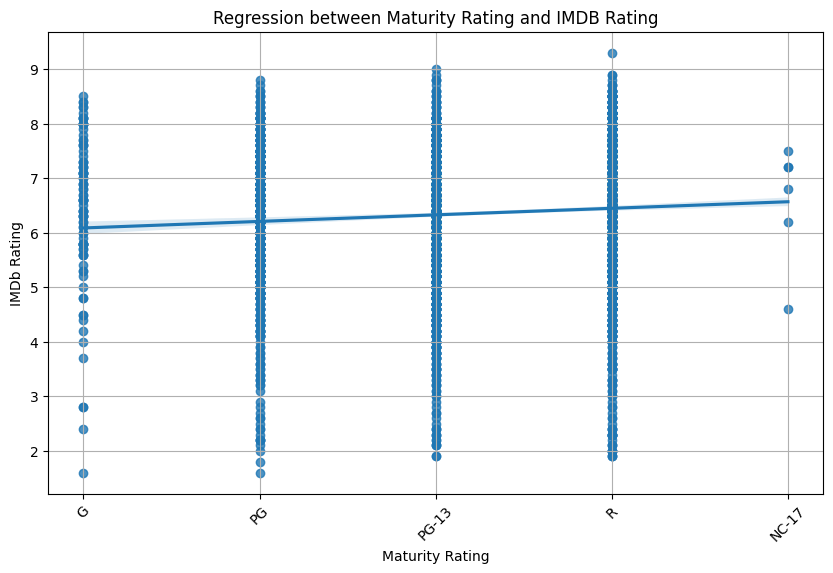

                            OLS Regression Results                            
Dep. Variable:               Rating_y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     31.06
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           2.66e-08
Time:                        05:10:59   Log-Likelihood:                -6696.0
No. Observations:                4309   AIC:                         1.340e+04
Df Residuals:                    4307   BIC:                         1.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.96

In [ ]:
'''
To see if we can prove our Primary question, we relied on performing OLS regression obtained from statsmodel api.
In this section we performed Ordinary Least Squares (OLS) regression to investigate the relationship between IMDB Rating and
the Maturity rating based on the previosuly specified order.
'''
import statsmodels.api as sm

#create variable x as independant var.(maturity rating) and y as dependant var(IMDB rating).
X = sm.add_constant(df_filtered['Maturity_Rating_Order'])
y = df_filtered['Rating_y']


# perform OLS using variables
OLS_Results = sm.OLS(y, X).fit()


#visualize the results using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='Maturity_Rating_Order', y='Rating_y')
plt.title('Regression between Maturity Rating and IMDB Rating')
plt.xticks(list(rating_scale.values()), list(rating_scale.keys()), rotation=45)
plt.xlabel('Maturity Rating')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

# Print the OLS Result Summary
print(OLS_Results.summary())

--------------------------------------------------------------------------
# **OLS Results:**

When we first performed our OLS  test, our initial goal was to see if we can prove or disprove our Primary question, "Does Maturity rating affect its IMDB rating?". However, based on the outcome of the results, we noticed that the P-value for the maturity rating we were hoping to obtain returned to us as 0.00 which we wanted to further investigate if this was true. However, when we analyze the results further, we also noticed that our maturity rating returned a positive coefficient value of .1202. and since our maturity rating was sorted in ascending order, this gave us solid evidence that indicates that there is, in fact, a trend in our data when it comes to the maturity rating and IMDB rating and that it is a slight, however positive trend. If we take a look at regression chart we can see the coef line gradualy sloping upwards aswell.  From this evidence, we were able to confidently prove our secondary question by rejecting our null hypothesis and accepting our alternative:

 **✅There is a trend in the data when it comes to the maturity rating and its IMDB rating and it is a positive trend**




In [ ]:
'''
Since our OLS test provided us with a p-value of 0.00, we wanted to further investigate if this was infact true, so inorder to do this
we performed a One-way Analysis of Variance (ANOVA) from scipy.stats in order to test and compare the means and check for differences between 2 or more categorical group (which in our case, our 5 maturity rating).
our test is aimed to obtain the calculated P-value from the one way ANOVA to see if our previous finding was true.
'''
import scipy.stats as stats

# Group the IMDB ratings by maturity rating for anova
group_rating_rated = [df_filtered['Rating_y'][df_filtered['Rated'] == rating] for rating in allowed_ratings]

# Conduct the anova test for significant differences between the maturity ratings
pvalue = stats.f_oneway(*group_rating_rated)

print("P-Value:", pvalue.pvalue)

P-Value: 3.875157540208817e-10


--------------------------------------------------------------------------
# **One Way Analysis of Variance (ANOVA) Results:**

After performing our One-Way ANOVA test, it provided us with a more comforting result and gave us insight as to why the OLS regression test gave us the result it did. After performing the test, it returned a value of 3.87 x 10 to the negative tenth (0.0000000003875157540208817) as our P-value. from this finding, since the value was so close to 0, this gave us solid evidence that stated that the maturity rating of a movie did significantly affect a movie's IMDB score. with such a low value, we were able to confidently reject our null hypothesis as even if we tested the p-value against the significance level of .01, the p-value returned is still much lower in comparison. by rejecting our null hypothesis we accept and prove our alternative:

**✅ Maturity rating does have an effect on the IMDB rating.**

--------------------------------------------------------------------------
# **Conclusion:**
After performing our tests we were able to answer our questions based on the evidence found. our findings allowed us to prove our first primary question that maturity rating **did** affect the IMDB rating. and based on the value we received being so close to 0, it allowed us to confidently state that the effect is significant. Additionally, we were also able to answer our secondary question and prove that there is in fact a trend in the data when it comes to the maturity rating and its IMDB rating and that it is a positive trend.

--------------------------------------------------------------------------

# **Primary Question:**
**Does Maturity rating affect it's IMDB rating?**

✅Maturity rating does have an effect on the IMDB rating.✅

# **Secondary Question:**
**Is there a trend (pos. or neg.) in the data when it comes to the maturity rating of a movie and its IMDB rating?**

✅There is a trend a positive trend in the data when it comes to the maturity rating and its IMDB rating.✅


--------------------------------------------------------------------------


# **Sources and References:**

 - **One Way ANOVA**

*Python for DataScience*

(https://www.pythonfordatascience.org/anova-python/)


*scipy.stats.f_oneway*

(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway)


*Python for Data Analysis: ANOVA - Video Reference*

(https://www.youtube.com/watch?v=EWYzeZbchR0&ab_channel=DataDaft)




---



 - **Ordinary Least Squares (OLS)**

*Statsmodel*

(https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)



*geeksforgeeks*

(https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/)



*Python Machine Learning | Linear Regression Ordinary Least Square OLS method in Statsmodels package - Video Reference*

(https://www.youtube.com/watch?v=L_h7XFUGWAk&t=210s&ab_channel=DataScienceTutorials)

---

 - **Data Souce(s)**

"*IMDB Top 250 List and 5000+ Entries*"

( https://data.world/studentoflife/imdb-top-250-lists-and-5000-or-so-data-records )


"*Top Rated English Movies of this decade from IMDB*"

(https://data.world/saipranav/top-rated-english-movies-of-this-decade-from-imdb)

--------------------------------------------------------------------------

---

# **Future Work**

Below are some of the elements from our analysis that we never got to further analyze to answer more questions due to time limitations. Although based on simple obeservations, we can infer some form of hypothesis to our questions, we cant specifically state this observation as true since we lack the conclusive evidence needed to support this.


These Questions are:

 - Is there a rising trend of higher maturity ratings as we approach present day?

  Based on the stacked bar graph shown below, we can hypothesize that there is a rapid growth of higher maturity rated films being made, more specifically rated R films, however we did not have conclusive evidence to support this hypothesis.

 - Are there simply more movies being made across all maturity ratings?

  If we analyze the density plot shown below, we can infer that there is infact a rapid growth in density in terms of movies being made throughout the years. more specifically, right after 1990, which is around the time we begin to approach the lower 25% of years. However as previously stated, although we can make this hypothesis, we were unable to concretely stand by this as we did not have the necessary evidence to prove or disprove the hypothesis.

--------------------------------------------------------------------------

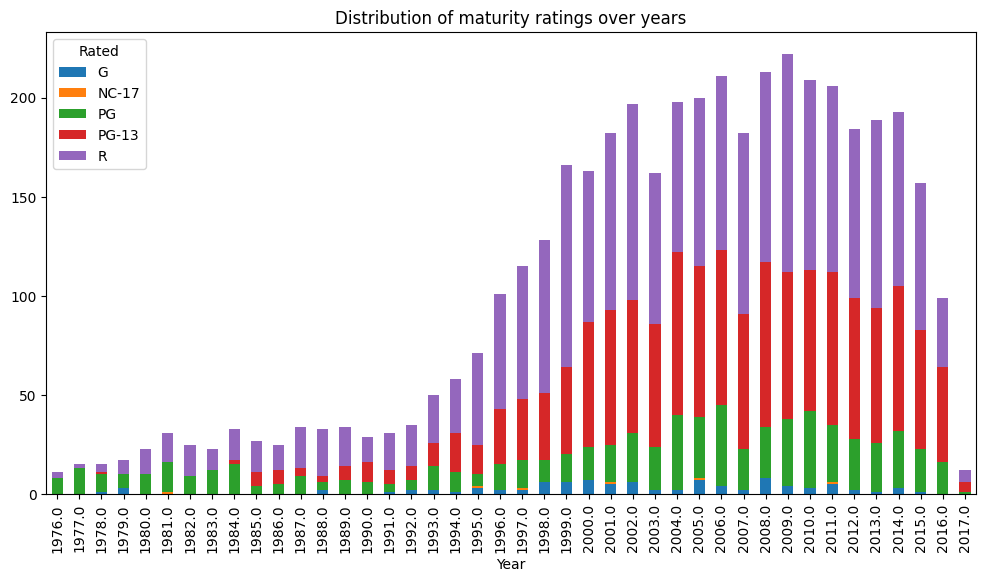

count    4309.000000
mean     2003.761430
std         8.611613
min      1976.000000
25%      1999.000000
50%      2005.000000
75%      2010.000000
max      2017.000000
Name: Year, dtype: float64


In [ ]:
'''
the graph below shows that there is a trend of higher maturity rated movies as we approach present day, specifically as we
approach the lower 25% of years.

the graph also shows that the number of movies being produced has certainly gone up the closer as we approach the present year.

'''


#group data frame by year an maturity rating
release_rating = df_filtered.groupby('Year')['Rated'].value_counts().unstack().fillna(0)
#visualize the grouped data onto a stacked bar chart to illustrate distribution of movies
release_rating.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution of maturity ratings over years')
plt.show()

#show the descriptive statistics for Years in the dataset.
print(df_filtered['Year'].describe())

<Axes: xlabel='Year', ylabel='Density'>

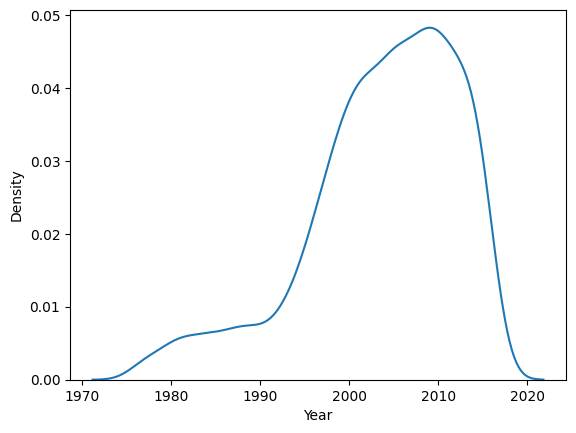

In [ ]:
#density plot representation of years in the dataset
#Highlights the rapid growth of movie production overall as we approach the present day
sns.kdeplot(df_filtered, x="Year")